<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101837
Name = 'Ali'
Last_Name = 'Kouchakzade'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [ ]:
#!pip install numpy
#!pip install matplotlib
#!pip install torchvision
#!pip install torch

## Importing Libraries

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [3]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 13958035.10it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263175.55it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4994122.10it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15489438.30it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [4]:
## FILL HERE
input_dim , num_classes = 28 * 28 , len(train_set.classes)
print(f'number of classes is {num_classes} include {str(train_set.classes)}')
print(f'input dimention is {train_set.data.shape}')
print(f'each image has 28 * 28 = {28 * 28} pixels')

number of classes is 10 include ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
input dimention is torch.Size([60000, 28, 28])
each image has 28 * 28 = 784 pixels


In [5]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

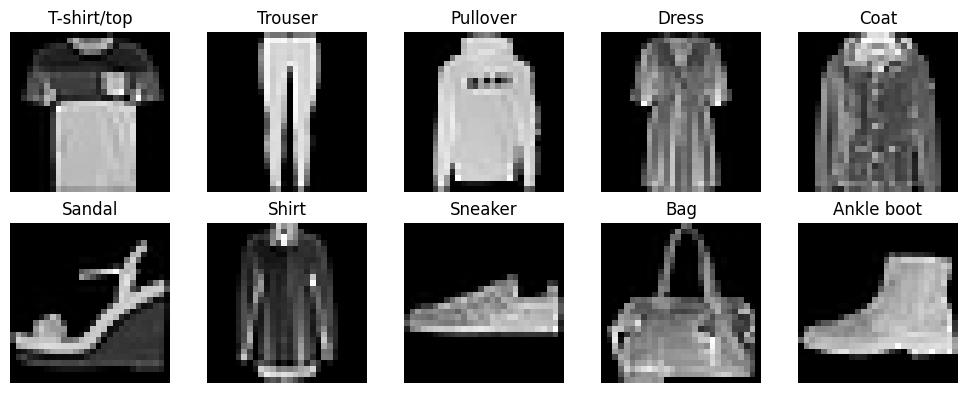

In [54]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_set.data[(train_set.targets == i).nonzero(as_tuple=True)[0][int(np.random.uniform() * 6000)],:,:],'gray')
    plt.title(train_set.classes[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [49]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
def affine_forward(x, w, b):
    return x @ w + b


def relu(x):
    return torch.maximum(torch.tensor(0,device=x.device),x)

Function `model` returns output of the whole model for the input `x` using the parameters:

In [11]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    B = x.shape[0]
    x = x.view(B, -1)
    dict_keys = ['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4']
    for i in range(num_layers):
        x = affine_forward(x,parameters[dict_keys[2*i+0]],parameters[dict_keys[2*i+1]])
        if i < num_layers - 1:
            x = relu(x)
    return x

Implementing cross entropy loss:

In [12]:
def cross_entropy_loss(scores, y):
    n = len(y)
    # Compute softmax activation
    exp_score = torch.exp(scores)
    prob = exp_score / torch.sum(exp_score,axis=1,keepdim = True)
    log_prob = -torch.log(prob[range(n),y])
    return torch.sum(log_prob) / n


Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [13]:
def sgd_optimizer(parameters: dict, learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    for param in parameters.values():
        if param.grad is not None:
            param.data -= learning_rate * param.grad.data
            param.grad.zero_()

Training functions:

In [88]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    correct = np.sum(y_pred == y_true)
    tot = len(y_true)
    return correct / tot


def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''

    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculating the accuracy later
    Y = []
    Y_pred = []
    train_loss = 0

    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        train_loss += loss.item()
        loss.backward()

        sgd_optimizer(parameters, learning_rate)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'epoch : {epoch} \n Accuracy of train set: {acc:.4f}')
    return train_loss / N_train, acc

def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)
        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f' Accuracy of {set_name} set: {acc:.4f}')

    return total_loss, acc


In [50]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [51]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
        train_loss , train_acc = train(train_loader,learning_rate,epoch)
        train_losses.append(train_loss) , train_accuracies.append(train_acc)

        test_loss , test_acc = validate(test_loader,epoch,'validate')
        test_losses.append(test_loss) , test_accuracies.append(test_acc)

    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    plt.title('losses vs epoch')
    plt.plot(range(num_epochs),train_losses,label='train')
    plt.plot(range(num_epochs),test_losses,label='test')
    plt.legend()
    plt.subplot(1,2,2)
    plt.title('accuracy vs epoch')
    plt.plot(range(num_epochs),train_accuracies,label='train')
    plt.plot(range(num_epochs),test_accuracies,label='test')
    plt.legend()

epoch : 0 
 Accuracy of train set: 0.2412
 Accuracy of validate set: 0.3055
epoch : 1 
 Accuracy of train set: 0.3054
 Accuracy of validate set: 0.3634
epoch : 2 
 Accuracy of train set: 0.5111
 Accuracy of validate set: 0.5920
epoch : 3 
 Accuracy of train set: 0.6455
 Accuracy of validate set: 0.6843
epoch : 4 
 Accuracy of train set: 0.7035
 Accuracy of validate set: 0.7088
epoch : 5 
 Accuracy of train set: 0.7378
 Accuracy of validate set: 0.7562
epoch : 6 
 Accuracy of train set: 0.7591
 Accuracy of validate set: 0.7536
epoch : 7 
 Accuracy of train set: 0.7729
 Accuracy of validate set: 0.7809
epoch : 8 
 Accuracy of train set: 0.7849
 Accuracy of validate set: 0.7932
epoch : 9 
 Accuracy of train set: 0.7972
 Accuracy of validate set: 0.7824
epoch : 10 
 Accuracy of train set: 0.8047
 Accuracy of validate set: 0.8123
epoch : 11 
 Accuracy of train set: 0.8132
 Accuracy of validate set: 0.8038
epoch : 12 
 Accuracy of train set: 0.8192
 Accuracy of validate set: 0.8187
epoch : 1

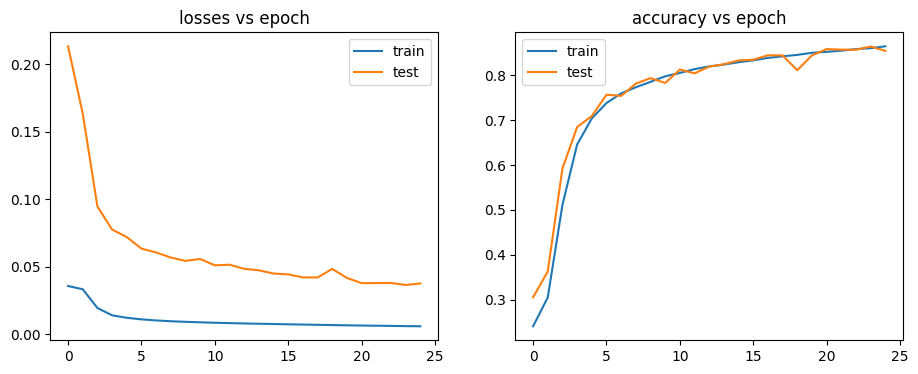

In [52]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [87]:
print(f'Final test accuracy: {test_accuracies[-1] * 100:.2f} % ')

Final test accuracy: 85.38 % 


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

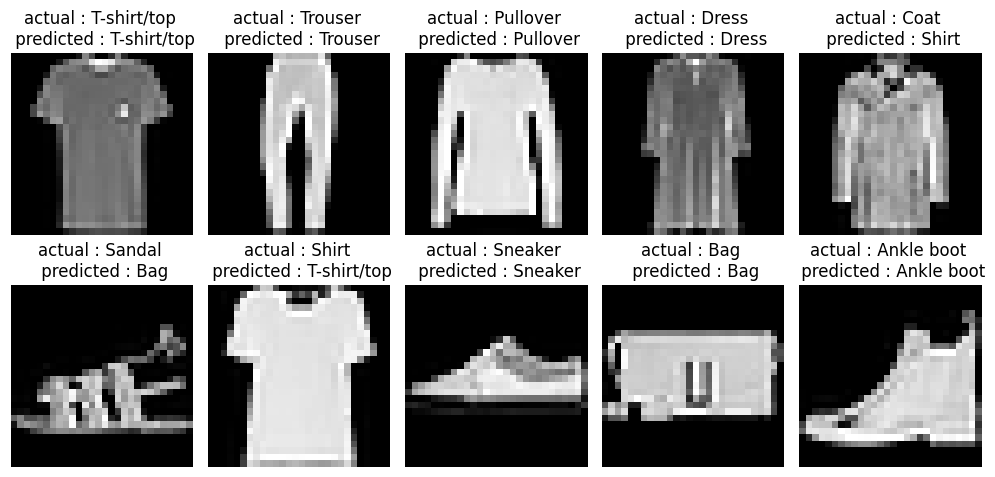

In [86]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = test_set.data[(test_set.targets == i).nonzero(as_tuple=True)[0][int(np.random.uniform() * 1000)],:,:]
    img = img.to(torch.float32)
    p = model(img.reshape(1,-1),parameters)
    y_pred = p.argmax(dim=-1)
    plt.imshow(img,'gray')
    plt.title(f'actual : {test_set.classes[i]} \n predicted : {test_set.classes[y_pred]}')
    plt.axis('off')
plt.tight_layout()
plt.show()